**분류의 성능 평가 지표**  
- 정확도  
- 오차행렬  
- 정밀도  
- 재현율  
- F1 스코어  
- ROC AUC  

<br>

**분류 구분**  
1. 이진 분류 : 결정 클래스 값의 유형에 따라 긍정/부정과 같은 2개의 결괏값을 가진다.  
2. 멀티 분류 : 여러 개의 결정 클래스 값을 가진다.  

## 3-1. 정확도(Accuracy)  
- 정확도는 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표이다.  
$$정확도(Accuracy) = \frac{예측 결과가 \, 동일한 \, 데이터 \, 건수}{전체 \, 예측 \, 데이터 \, 건수}$$

In [1]:
# 성별에 따라 생존자를 예측하는 단순한 Classifier 생성
import numpy as np

# 사이킷런은 BaseEstimator를 상속받으면 Customized 형태의 Estimator 생성 가능
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit( ) 메소드는 아무것도 학습하지 않음. 
    def fit(self , X , y=None):
            pass
    
    # predict( ) 메소드는 단순히 Sex feature가 1 이면 0 , 그렇지 않으면 1 로 예측함. 
    def predict(self, X):
        pred = np.zeros( ( X.shape[0] , 1))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [3]:
# MyDummyClassifier를 이용해 타이타닉 생존자 예측 수행
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df,test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가 수행. 
myclf = MyDummyClassifier()
myclf.fit(X_train ,y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test , mypredictions)))

Dummy Classifier의 정확도는: 0.7877


이렇게 단순한 알고리즘으로 예측을 하더라도 데이터의 구성에 따라 정확도 결과는 약 78.77%로 꽤 높은 수치가 나올 수 있기에 정확도를 평가 지표로 사용할 때는 매우 신중해야 한다. 


<u>특히 정확도는 불균형한 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 평가 지표가 아니다.</u> 예를 들어, 100개의 데이터 중 90개의 데이터 레이블이 0, 단 10개의 데이터 레이블이 1이라고 하면 무조건 0으로 예측 결과를 반환하는 ML 모델의 경우라도 정확도가 90%가 된다.

### MNIST 데이터 세트  
: MNIST 데이터 세트를 변환해 불균형한 데이터 세트로 만든 뒤에 정확도 지표 적용 시 어떤 문제가 발생하는지?  


- MNIST 데이터 세트는 0부터 9까지의 숫자 이미지의 픽셀 정보를 가지고 있으며, 이를 기반으로 숫자 Digit를 예측하는데 사용된다. 

In [4]:
# MNIST 데이터 셋을 multi classification에서 binary classification으로 변경
# 레이블 7인 것만 true, 나머지 false

# 불균형한 데이터 세트와 Dummy Classifier 생성
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass

    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어 반환
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)
    
# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 Fasle이고 0으로 변환
y = (digits.target ==7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [5]:
# 불균형한 데이터로 생성한 y_test의 데이터 분포도를 확인하고, MyFakeClassifier를 이용해 예측과 평가를 수행

# 분균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train,y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test,fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


- 단순히 predict()의 결과를 np.zeros()로 모두 0값으로 반환함에도 불구하고 450개의 테스트 데이터 세트에 수행한 예측 정확도는 90%  
→ 정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용돼서는 안 된다.  
→ 이러한 한계점을 극복하기 위해 여러 가지 분류 지표와 함께 적용해야 한다.

## 3-2. 오차 행렬

**오차행렬(confusion matrix, 혼동행렬)**  
1. 의미  
  - 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 있는지도 함께 보여주는 지표이다.  
=> <u>이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표</u>


2. 4분면 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떠한 유형을 가지고 매핑되는지를 나타낸다.  
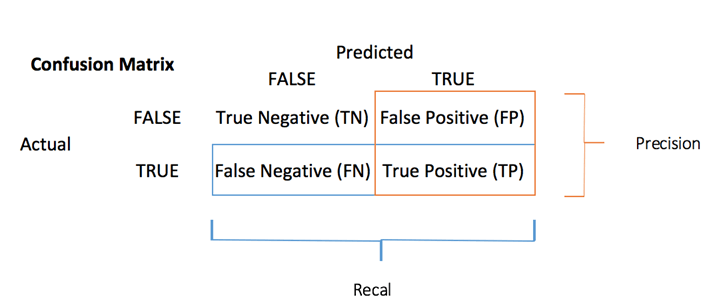


- TN : 예측값을 Negative 값 0으로 예측했고 실제 값 역시 Negative 값 0   
- FP : 예측값을 Positive 값 1로 예측했는데 실제 값은 Negative 값 0  
- FN : 예측값을 Negative 값 0으로 예측했는데 실제 값은 Positive 값 1(Negative로 예측할 때 틀린 데이터 수)  
- TP : 예측값을 Positive 값 1로 예측했는데 실제 값 역시 Positive 값 1  


=>  TP, TN, FP, TN 값은 Classifier 성능의 여러 면모를 판단할 수 있는 기반 정보를 제공한다. 이 값을 조합해 Classifier의 성능을 측정할 수 있는 주요 지표인 정확도(Accuracy), 정밀도(Precision), 재현율(Recall) 값을 알 수 있다.

In [6]:
# 무조건 Negative로 예측하는 Classifier였으며 테스트 데이터 세트의 클래스 값 분포는 0이 405건, 1이 45건

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred) 

array([[405,   0],
       [ 45,   0]], dtype=int64)

| 분류 | 위치 | 건수 | 예측 | 실제 |
| :-: | :-: | :-: | :-: | :-: |
| TN | array[0,0] | 405 | Negative(7이 아닌 Digit) | Negative(7이 아닌 Digit) |
| FP | array[0,1] | 0 | Positive(Digit 7) | Negative(7이 아닌 Digit) |
| FN | array[1,0] | 45 | Negative(7이 아닌 Digit) | Positive(Digit 7) |
| TP | array[1,1] | 0 | Positive(Digit 7) | Positive(Digit 7) |

정확도는 예측값과 실제 값이 얼마나 동일한 가에 대한 비율만으로 결정된다. 즉, 오차 행렬에서 True에 해당하는 값인 TN과 TP에 좌우된다.  
→ **정확도  = 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수 = (TN+TP)/(TN+FP+FN+TP)**  

----
불균형한 이진 분류 데이터 세트에서는 Positive 데이터 건수가 매우 작기 때문에 데이터에 기반한 ML 알고리즘은 Positive보다는 Negative로 예측 정확도가 높아지는 경향이 발생한다.  => TN ↑, TP ↓, FN ↓, FP ↓


결과적으로 정확도 지표는 비대칭한 데이터 세트에서 Positive에 대한 예측 정확도를 판단하지 못한 채 Negative에 대한 예측 정확도만으로도 분류의 정확도가 매우 높게 나타나는 수치적인 판단 오류를 일으키게 된다.  

## 3-3. 정밀도와 재현율

: 정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표이다.  


- 정밀도 = TP / (FP + TP)  
- 재현율 = TP / (FN + TP)  
→ 재현율과 정밀도 모두 TP를 높이는 데 동일하게 초점을 맞추지만, 재현율은 FN를 낮추는데, 정밀도는 FP를 낮추는데 초점을 맞춘다.  
→ 재현율과 정밀도는 서로 보완적인 지표로 분류의 성능을 평가하는 데 적용된다.  


1. 정밀도  
  - <u>**예측**을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율</u>로, Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 양성 예측도라고도 불린다.  
  - 공식의 분모인 FP + TP : 예측을 Positive로 한 모든 데이터 건수  
  - 공식의 분자인 TP : 예측과 실제 값이 Positive로 일치한 데이터 건수  


2. 재현율  
  - <u>**실제 값**이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율</u>로, 민감도(Sensitivity) 또는 TPR(True Positive Rate)라고도 불린다.  
  - 공식의 분모인 FN + TP : 실제 값이 Positive인 모든 데이터 건수  
  - 공식의 분자인 TP : 예측과 실제 값이 Positive로 일치한 데이터 건수  
  
  
3. 정밀도와 재현율 지표 중에 이진 분류 모델의 업무 특성에 따라 특정 평가 지표가 더 중요한 지표로 간주될 수 있다.  
  - **재현율이 상대적으로 더 중요한 지표인 경우는 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 (ex. 암 판단 모델)**  
  - 정밀도가 상대적으로 더 중요한 지표인 경우는 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 (ex. 스팸 메일 여부 판단)

In [7]:
# precision_score() : 정밀도 계산, recall_score() : 재현율 계산
# confusion matrix, accuracy, precision, recall 등의 평가를 한꺼번에 호출하는 get_clf_eval() 함수

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [8]:
# 로지스틱 회귀 기반으로 타이타닉 생존자를 예측하고 confusion matrix, accuracy, precision, recall 평가 수행
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df) # 앞에 있는 함수

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

C:\Users\dldms\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


- 정밀도에 비해 재현율이 낮게 나왔다

### 정밀도/재현율 트레이드오프

분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임계값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있지만, 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다. 이를 정밀도/재현율의 트레이드오프(Trade-off)라고 부른다.  
<br>

**사이킷런의 분류 알고리즘**  
1. 예측 데이터가 특정 레이블(Label, 결정 클래스 값)에 속하는지를 계산하기 위해 먼저 개별 레이블별로 결정 확률을 구한다.  
2. 예측 확률이 큰 레이블 값으로 예측  
  ex. 이진 분류 모델에서 특정 데이터가 0이 될 확률이 10%, 1이 될 확률이 90%로 예측됐다면 최종 예측은 더 큰 확률을 가진, 즉 90% 확률을 가진 1로 예측
  => 일반적으로 이진 분류에서는 이 임계값을 0.5로 정해 이 값보다 확률이 크면 Positive, 작으면 Negative로 결정    
<br> 

**predict_proba()**  
: 개별 데이터별로 예측 확률을 반환
- 학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능하며 <u>테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환한다.</u>  
- predict()와 유사하지만 단지 반환 결과가 예측 결과 클래스 값이 아닌 예측 확률 결과이다. 반환결과는 개별 클래스의 예측 확률로 ndarray n * m (m: 입력 값의 레코드 수, n: 클래스 값 유형) 형태이다.    
- 각 열은 개별 클래스의 예측확률이다. 이진 분류에서 첫 번째 칼럼은 0 Negative의 확률, 두 번째 칼럼은 1 Positive의 확률이다.  

In [12]:
# LogisiticRegression 객체에서 predict_proba() 메서드를 수행한 뒤 반환 값을 확인
# predict() 메서드의 결과와 비교

pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출\n:',pred_proba[:3])

# 예측 확률 array와 예측 결과값 array를 병합해 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1) # 벼합
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출
: [[0.44935228 0.55064772]
 [0.86335513 0.13664487]
 [0.86429645 0.13570355]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935228 0.55064772 1.        ]
 [0.86335513 0.13664487 0.        ]
 [0.86429645 0.13570355 0.        ]]


- 반환 결과인 ndarray는 0과 1에 대한 확률을 나타내므로 첫번째 칼럼값 + 두번째 칼럼값 = 1  
- predict()는 predict_proba() 호출 결과로 반환된 배열에서 분류 결정 임계값보다 큰 값이 들어 있는 칼럼의 위치를 받아 최종적으로 예측 클래스를 결정한다.

In [13]:
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],
    [2,0,0],
    [0,1.1,1.2]]

# X의 개별 원소들이 threshold값(1.1)보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold = 1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [14]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값, 분류 결정 임곗값임
custom_threshold = 0.5

# Predict_proba() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict) # confusion matrix, accuracy, precision, recall 등의 평가를 한꺼번에 호출(앞에서 정의)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


- 앞 예제의 타이타닉 데이터로 학습된 로지스틱 회귀 Classifier 객체에서 호출된 predict()로 계산된 지표 값과 정확히 같다. predict()가 predict_proba()에 기반함을 알 수 있다.  

In [15]:
# Binarizer의 threshold 설정값을 0.4로 설정(분류 결정 임계값 : 0.5 -> 0.4)
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


- 임계값을 낮추니 재현율 ↑, 정밀도 ↓  
    - 분류 결정 임계값은 Positive 예측값을 결정하는 확률의 기준이 된다.  
    - 확률이 0.5가 아닌 0.4부터 Positive로 예측을 더 너그럽게 하기 때문에 임곗값 값을 낮출수록 True 값이 많아진다.  
    - Positive 예측값이 많아지면 상대적으로 재현율 값이 높아진다. 양성 예측을 많이 하다 보니 실제 양성을 음성으로 예측하는 횟수가 상대적으로 줄어들기 때문이다.     
=> <u>분류 결정 임계값이 낮아질수록 Positive로 예측할 확률이 높아진다.</u>
    

| 임계값 0.5일 때 오차 행렬 |  |   
| :-: | :-: | 
| TN(108) | FP(10) |
| FN(14) | TP(47) | 

| 임계값 0.4일 때 오차 행렬 |  | 
| :-: | :-: | 
| TN(97) | FP(21) |
| FN(11) | TP(50) |   


- 재현율 : 0.770 → 0.820  
    - TP : 47 → 50  
    - FN : 14 → 11
    
    
- 정밀도 : 0.825 → 0.704, 정확도 : 0.866 → 0.821  
    - FP : 10 → 21  

In [16]:
# 테스트를 수행할 모든 임계값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1),thresholds) # 임계값 0.45가 적당

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213


**precision_recall_curve()**  
1. 입력 파라미터  
    - y_true: 실제 클래스값 배열(배열크기 = [데이터 건수])  
    - probas_pred : Positive 칼럼의 예측 확률 배열 (배열크기 = [데이터 건수])  


2. 반환값  
    - 정밀도(precision) : 임곗값별 정밀도 값을 배열로 반환  
    - 재현율(recall) : 임곗값별 재현율 값을 배열로 반환  
    

3. 일반적으로 0.11 ~ 0.95 정도의 임곗값을 담은 넘파이 ndarray와 이 임곗값에 해당하는 정밀도 및 재현율 값을 담은 넘파이 ndarray를 반환  

In [20]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:',thresholds.shape)

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출
thr_index = np.arange(0, thresholds.shape[0],15) # 0부터 15씩 차이나도록 
print('샘플 추출을 위한 임계값 배열의 index 10개:',thr_index)
print('샘플용 10개의 임곗값:',np.round(thresholds[thr_index],2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도: ',np.round(precisions[thr_index],3)) # 정밀도
print('샘플 임계값별 재현율: ',np.round(recalls[thr_index],3)) # 재현율

반환된 분류 결정 임곗값 배열의 Shape: (147,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값: [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
샘플 임계값별 정밀도:  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


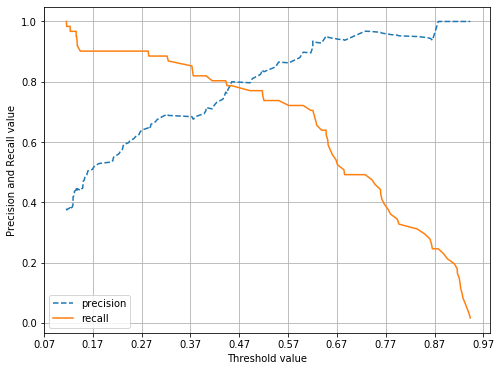

In [22]:
# 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태의 그래프로 시각화하는데 이용
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따르 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

- 정밀도는 점선으로 재현율은 실선으로 표현  
- 임곗값이 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 극도로 낮아진다.  
- 임계값을 계속 증가시킬수록 재현율 값이 낮아지고 정밀도 값이 높아지는 반대의 양상이 된다.  

### 정밀도와 재현율의 맹점

**정밀도가 100%가 되는 방법**  
- 확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측한다.  
- 정밀도 = TP / (TP + FP)  
ex. 전체 환자가 1000명 중 확실한 Positive 징후만 가진 환자는 단 1명이라고 하면 이 한 명만 Positive 징후만 가진 환자는 단 1명이라고 하면 이 한 명만 Positive로 예측하고 나머지는 모두 Negative로 예측하더라도 FP는 0, TP는 1이 되므로 정밀도는 1/(1+0)으로 100%가 된다.  


**재현율이 100%가 되는 방법**  
- 모든 환자를 Positive로 예측하면 된다.  
- 재현율 = TP / (TP + FN)  
ex. 전체 환자가 1000명을 다 Positive로 예측한다. 이 중 실제 양성인 사람이 30명 정도라도 TN이 수치에 포함되지 않고 FN은 아예 0이므로 30/(30+0)으로 100%가 된다.  


=> 위와 같은 상황이 돼서는 안 되고 정밀도와 재현율의 수치가 적절하게 조합돼 분류의 종합적인 성능 평가에 사용될 수 있는 평가 지표가 필요하다.

## 3-4. F1 스코어

F1 스코어(Score)는 정밀도와 재현율을 결합한 지표이다. <u>F1 스코어는 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가진다.</u>  

$$F1 = \frac{2}{ \frac{1}{recall}+ \frac{1}{precision}} = 2 * \frac{precision*recall}{precision+recall}$$

In [28]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7966


In [30]:
# 타이타닉 생존자 예측에서 임계값을 변화시키면서 F1 스코어를 포함한 평가지표 구하기

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy,precision,recall,f1))
    
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1:0.7576
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1:0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1:0.7966
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1:0.7965
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1:0.8000


- F1 스코어는 임곗값이 0.6일때 가장 좋지만 재현율이 크게 감소하고 있어 주의해야 한다.

## 3-5. ROC 곡선과 AUC

ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표이다. 

<br>

**ROC 곡선(Receiver Operation Characteristic Curve)**
- 우리말로 수신자 판단 곡선으로 불린다.  
- <u>ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(Ture Positive Rate)이 어떻게 변하는지를 나타내는 곡선이다.</u> FPR을 X축으로, TPR을 Y축으로 잡으면 FPR의 변화에 따르 TPR의 변화가 곡선 형태로 나타난다.  


**TPR(=재현율, 민감도)**  
- Ture Positive Rate의 약자이며, 재현율을 나타낸다.  
- 따라서 TPR은 TP / (FN + TP)이다.


**TNR(=특이성)**  
- True Negative Rate의 약자이며 특이성을 나타낸다.  
- TNR = TN  / (FP + TN)  


**FPR(False Positive Rate)**  
- ROC 곡선의 X 축 기준  
- FPR = FP / (FP + TN) = 1 - TNR = 1 - 특이성  

---
=> 민감도(TPR)은 실제값 Positive(양성)가 정확히 예측돼야 하는 수준을 나타낸다.(ex. 질병이 있는 사람은 질병이 있는 것으로 양성 판정)  
=> 특이성(TNR)은 실제값 Negative(음성)가 정확히 예측돼야 하는 수준을 나타낸다.(ex. 질병이 없는 건강한 사람은 질병이 없는 것으로 음성 판정)   

---

**ROC 곡선**  
- ROC 곡선은 FPR을 0부터 1까지 변경하면서 TPR의 변화 값을 구한다.  


Q. FPR을 0부터 1까지 어떻게 변경하는지?  
A. 분류 결정 임계값(Positive 예측값을 결정하는 확률의 기준)을 변경


1. FPR = 0으로 만들려면  
    - 임계값을 1로 지정  
    -> Positive 예측 기준이 매우 높기 때문에 분류기(Classifier)가 임곗값보다 높은 확률을 가진 데이터를 Positive로 예측할 수 없다.  
    => 아예 Positive로 예측하지 않기 때문에 FP 값이 0이 되므로 FPR은 0이 된다.  


2. FPR = 1로 만들려면  
    - 임계값을 0으로 지정    
    -> TN을 0으로 만듦  
    -> 분류기의 Positive 확률 기준이 너무 낮아 다 Positive로 예측  
    -> Negative 예측이 없어 TN이 0이되고 FPR은 1이된다.  
    
    
=> 임계값을 1부터 0까지 변화시키면서 FPR을 구하고 이 FPR 값의 변화에 따른 TPR 값을 구하는 것이 ROC 곡선이다.    


**roc_curve()**  
1. 입력 파라미터  
  - y_true : 실제 클래스 값 array (array shape = [데이터 건수])  
  - y_score : predict_prob()의 반환 값 array에서 Positive 칼럼의 예측 확률이 보통 사용됨. arrray, shape = [n_samples]  


2. 반환값  
  - fpr : fpr 값을 array로 반환  
  - tpr : tpr 값을 array로 반환  
  - thresholds : threshold 값 array  

In [31]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임계값을 5 Step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임계값 배열의 index 10개: ',thr_index)
print('샘플용 10개의 임계값: ',np.round(thresholds[thr_index],2))

# 5 step 단위로 추출된 임계값에 따르 FPR, TPR 값
print('샘플 임계값별 FPR: ',np.round(fprs[thr_index],3))
print('샘플 임계값별 TPR: ',np.round(tprs[thr_index],3))

샘플 추출을 위한 임계값 배열의 index 10개:  [ 0  5 10 15 20 25 30 35 40 45]
샘플용 10개의 임계값:  [1.94 0.87 0.63 0.55 0.44 0.32 0.15 0.14 0.13 0.12]
샘플 임계값별 FPR:  [0.    0.008 0.025 0.059 0.127 0.203 0.559 0.602 0.695 0.847]
샘플 임계값별 TPR:  [0.    0.246 0.672 0.738 0.787 0.885 0.902 0.951 0.967 0.984]


- 임계값이 1에 가까운 값에서 점점 작아지면서 FPR이 점점 커진다.  
- FPR이 조금씩 커질 때 TPR은 가파르게 커진다.  

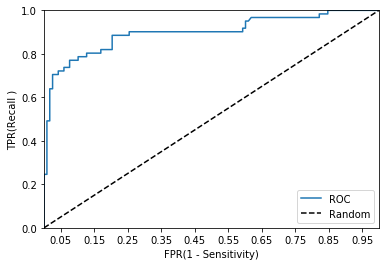

In [35]:
# FPR의 변화에 따른 TPR의 변화를 ROC 곡선으로 시각화

def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1],'k--',label='Random') # k : 검은색, -- : 점선
    
    # FPR x축의 Scale을 0.1 단위로 변경, X,Y축 명 설정 등
    start, end = plt.xlim() # 현재 좌표축 또는 차트의 x축 제한을 설정
    plt.xticks(np.round(np.arange(start, end, 0.1),2)) # xticks() : x축에 눈금을 표시
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall )')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:,1])

일반적으로 ROC 곡선 자체는 FPR과 TPR의 변화 값을 보는 데 이용하며 분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC 값으로 결정한다. AUC(Area Under Curve) 값은 ROC 곡선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울수록 좋은 수치이다. AUC 수치가 커지려면 FRP이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건이다. 가운데 직선에서 멀어지고 왼쪽 상단 모서리 쪽으로 가파르게 곡선이 이동할수록 직사각형에 가까운 곡선이 되어 면적이 1에 가까워지는 좋은 ROC AUC 성능 수치를 얻게 된다. 가운데 대각선 직선은 랜덤 수준의 이진 분류 AUC 값으로 0.5이다. 따라서 보통의 분류는 0.5 이상의 AUC 값을 가진다. 

In [36]:
from sklearn.metrics import roc_auc_score

pred = lr_clf.predict(X_test)
roc_score = roc_auc_score(y_test, pred)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8429
